# Exploratory Data Analysis

## Elite Sports Cars uncleaned Dataset

###  1. Dataset Overview

In [2]:
# Importing Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv("Elite Sports Cars uncleaned.csv")


In [3]:
df

,Brand,Year,Continent,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Type,Price,Mileage,Market_Demand
0,Nissan,2006,Asia,-3.7,420.0,705.0,1785,238.0,5.7,Diesel,81580,96664,Medium
1,McLaren,2009,Europe,-5.3,NaN,NaN,992,386.0,20.0,Electric,308455,159630,Medium
2,Chevrolet,2009,USA,-5.5,153.0,1573.0,6000,NaN,6.7,Diesel,420374,111496,Low
3,Bugatti,1982,Asia,5.4,544.0,1009.0,1091,151.0,-2.7,Petrol,123690,217228,Medium
4,Nissan,2022,Europe,2.4,NaN,693.0,1232,385.0,3.0,Petrol,75303,150318,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Ford,2011,Europe,5.2,851.0,308.0,2466,282.0,4.9,Electric,113906,110655,High
215,Ferrari,2009,USA,5.8,1375.0,139.0,1189,1167.0,3.1,Diesel,349499,72338,Medium
216,Chevrolet,2024,USA,7.2,311.0,970.0,2179,357.0,3.3,Electric,259999,63699,Low
217,Nissan,2005,Europe,2.0,900.0,1426.0,2129,351.0,5.9,Diesel,311294,237329,High


In [15]:
# Show first and last few rows (head(), tail())

df.head()

,Brand,Year,Continent,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Type,Price,Mileage,Market_Demand
0,Nissan,2006,Asia,-3.7,420.0,705.0,1785,238.0,5.7,Diesel,81580,96664,Medium
1,McLaren,2009,Europe,-5.3,NaN,NaN,992,386.0,20.0,Electric,308455,159630,Medium
2,Chevrolet,2009,USA,-5.5,153.0,1573.0,6000,NaN,6.7,Diesel,420374,111496,Low
3,Bugatti,1982,Asia,5.4,544.0,1009.0,1091,151.0,-2.7,Petrol,123690,217228,Medium
4,Nissan,2022,Europe,2.4,NaN,693.0,1232,385.0,3.0,Petrol,75303,150318,Medium


In [16]:
df.tail()

,Brand,Year,Continent,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Type,Price,Mileage,Market_Demand
214,Ford,2011,Europe,5.2,851.0,308.0,2466,282.0,4.9,Electric,113906,110655,High
215,Ferrari,2009,USA,5.8,1375.0,139.0,1189,1167.0,3.1,Diesel,349499,72338,Medium
216,Chevrolet,2024,USA,7.2,311.0,970.0,2179,357.0,3.3,Electric,259999,63699,Low
217,Nissan,2005,Europe,2.0,900.0,1426.0,2129,351.0,5.9,Diesel,311294,237329,High
218,Lamborghini,2015,Europe,3.5,598.0,1017.0,2398,266.0,6.0,Diesel,85537,19866,Low


In [17]:
# Shape (rows × columns)

df.shape

(219, 13)

In [18]:
# List of column names

df.columns.tolist()


['Brand',
 'Year',
 'Continent',
 'Engine_Size',
 'Horsepower',
 'Torque',
 'Weight',
 'Top_Speed',
 'Acceleration_0_100',
 'Fuel_Type',
 'Price',
 'Mileage',
 'Market_Demand']

In [19]:
# Data types of each feature

df.dtypes

Brand                  object
Year                    int64
Continent              object
Engine_Size           float64
Horsepower            float64
Torque                float64
Weight                  int64
Top_Speed             float64
Acceleration_0_100    float64
Fuel_Type              object
Price                   int64
Mileage                 int64
Market_Demand          object
dtype: object

In [20]:
#Count of missing values

df.isnull().sum()

Brand                 0
Year                  0
Continent             0
Engine_Size           0
Horsepower            2
Torque                1
Weight                0
Top_Speed             1
Acceleration_0_100    0
Fuel_Type             0
Price                 0
Mileage               0
Market_Demand         0
dtype: int64

In [21]:
# Count of unique values

df.nunique()

Brand                  10
Year                   44
Continent               6
Engine_Size            68
Horsepower            204
Torque                205
Weight                209
Top_Speed             145
Acceleration_0_100     52
Fuel_Type               3
Price                 219
Mileage               219
Market_Demand           3
dtype: int64

##  2. Data Quality Checks

In [22]:
# Find missing values

df.isnull().sum()

Brand                 0
Year                  0
Continent             0
Engine_Size           0
Horsepower            2
Torque                1
Weight                0
Top_Speed             1
Acceleration_0_100    0
Fuel_Type             0
Price                 0
Mileage               0
Market_Demand         0
dtype: int64

In [23]:
# Detect duplicate rows

df.duplicated().sum()

np.int64(0)

In [26]:
# identify erroneous data (e.g., negative ages, invalid values)

num_cols = df.select_dtypes(include='number').columns

invalid_numeric = {c: df[df[c] < 0].index.tolist() for c in num_cols}
invalid_type = {c: df[~df[c].apply(lambda x: isinstance(x, (int, float, np.integer, np.floating)))].index.tolist() for c in num_cols}
missing = df.isna().sum()

print("\n--- NEGATIVE VALUES ---")
print({k: v for k, v in invalid_numeric.items() if v})
print("\n--- INVALID TYPES ---")
print({k: v for k, v in invalid_type.items() if v})
print("\n--- MISSING VALUES ---")
print(missing[missing > 0])

err_rows = sorted(set(sum(invalid_numeric.values(), []) + sum(invalid_type.values(), [])))
if err_rows:
    print(f"\nRows with errors: {err_rows}")
    display(df.loc[err_rows])
else:
    print("\n✅ No numeric or type errors found.")



--- NEGATIVE VALUES ---
{'Engine_Size': [0, 1, 2, 5, 7], 'Acceleration_0_100': [3]}

--- INVALID TYPES ---
{}

--- MISSING VALUES ---
Horsepower    2
Torque        1
Top_Speed     1
dtype: int64

Rows with errors: [0, 1, 2, 3, 5, 7]


,Brand,Year,Continent,Engine_Size,Horsepower,Torque,Weight,Top_Speed,Acceleration_0_100,Fuel_Type,Price,Mileage,Market_Demand
0,Nissan,2006,Asia,-3.7,420.0,705.0,1785,238.0,5.7,Diesel,81580,96664,Medium
1,McLaren,2009,Europe,-5.3,NaN,NaN,992,386.0,20.0,Electric,308455,159630,Medium
2,Chevrolet,2009,USA,-5.5,153.0,1573.0,6000,NaN,6.7,Diesel,420374,111496,Low
3,Bugatti,1982,Asia,5.4,544.0,1009.0,1091,151.0,-2.7,Petrol,123690,217228,Medium
5,BMW,1986,Europe,-5.4,1091.0,632.0,2135,341.0,3.4,Petrol,478142,228779,Medium
7,Nissan,2020,USA,-7.4,1189.0,184.0,1526,185.0,6.7,Diesel,133803,202882,Medium


In [27]:
# Spot formatting issues
(e.g., extra spaces, inconsistent cases)

string_cols = df.select_dtypes(include='object').columns

for col in string_cols:
    print(f"\nColumn: {col}")
    print("Unique values before cleaning:")
    print(df[col].unique())
    print("Unique values after strip().lower():")
    print(df[col].str.strip().str.lower().unique())



Column: Brand
Unique values before cleaning:
['Nissan' 'McLaren' 'Chevrolet' 'Bugatti' 'BMW' 'Porsche' 'Aston Martin'
 'Lamborghini' 'Ferrari' 'Ford']
Unique values after strip().lower():
['nissan' 'mclaren' 'chevrolet' 'bugatti' 'bmw' 'porsche' 'aston martin'
 'lamborghini' 'ferrari' 'ford']

Column: Continent
Unique values before cleaning:
['  Asia' 'Europe' 'USA' 'Asia' '    Europe' '   USA']
Unique values after strip().lower():
['asia' 'europe' 'usa']

Column: Fuel_Type
Unique values before cleaning:
['Diesel' 'Electric' 'Petrol']
Unique values after strip().lower():
['diesel' 'electric' 'petrol']

Column: Market_Demand
Unique values before cleaning:
['Medium' 'Low' 'High']
Unique values after strip().lower():
['medium' 'low' 'high']


#  3. Data Cleaning

In [51]:
# Handle missing data (drop or impute with mean/median/mode)
# Before cleaning
print("Missing values before cleaning:\n", df.isna().sum())
print("....................................................")
print("....................................................")

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

# Impute missing values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())     # mean for numeric columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])                         # mode for categorical columns

# After cleaning
print("\nMissing values after cleaning:\n", df.isna().sum())


Missing values before cleaning:
 brand                 0
year                  0
continent             0
engine_size           0
horsepower            0
torque                0
weight                0
top_speed             0
acceleration_0_100    0
fuel_type             0
price                 0
mileage               0
market_demand         0
dtype: int64
....................................................
....................................................

Missing values after cleaning:
 brand                 0
year                  0
continent             0
engine_size           0
horsepower            0
torque                0
weight                0
top_speed             0
acceleration_0_100    0
fuel_type             0
price                 0
mileage               0
market_demand         0
dtype: int64


In [52]:
# Remove or treat duplicates

print("Duplicate rows before removing:", df.duplicated().sum())

# Remove duplicates
df_no_dup = df.drop_duplicates()

print("Duplicate rows after removing:", df_no_dup.duplicated().sum())


Duplicate rows before removing: 0
Duplicate rows after removing: 0


In [56]:
# Correct or remove incorrect values

print("Incorrect values before correction:")

# Detect incorrect values
negatives = df[df.select_dtypes(include='number') < 0].dropna(how='all')
invalid_years = df[(df['year'] < 2000) | (df['year'] > 2025)]
invalid_accel = df[df['acceleration_0_100'] < 0]

print("Negative numeric values:\n", negatives)
print("Invalid years:\n", invalid_years)
print("Negative acceleration:\n", invalid_accel)

# ---- Correction ----
num_cols = df.select_dtypes(include='number').columns

# Replace negative numeric values with NaN
df[num_cols] = df[num_cols].apply(lambda col: col.map(lambda x: np.nan if x < 0 else x))

# Replace invalid years with median year
df['year'] = df['year'].apply(lambda x: df['year'].median() if x < 2000 or x > 2025 else x)

# Remove rows with missing (incorrect) values after correction
df = df.dropna()

# ---- Verify ----
print("\nIncorrect values after correction:\n", df.isna().sum())
print("✅ All incorrect or missing values corrected/removed successfully.")


Incorrect values before correction:
Negative numeric values:
 Empty DataFrame
Columns: [brand, year, continent, engine_size, horsepower, torque, weight, top_speed, acceleration_0_100, fuel_type, price, mileage, market_demand]
Index: []
Invalid years:
 Empty DataFrame
Columns: [brand, year, continent, engine_size, horsepower, torque, weight, top_speed, acceleration_0_100, fuel_type, price, mileage, market_demand]
Index: []
Negative acceleration:
 Empty DataFrame
Columns: [brand, year, continent, engine_size, horsepower, torque, weight, top_speed, acceleration_0_100, fuel_type, price, mileage, market_demand]
Index: []

Incorrect values after correction:
 brand                 0
year                  0
continent             0
engine_size           0
horsepower            0
torque                0
weight                0
top_speed             0
acceleration_0_100    0
fuel_type             0
price                 0
mileage               0
market_demand         0
dtype: int64
✅ All incorrec

In [58]:
# Standardize Formatting

print("Before formatting:\n")
print(df.head())

# --- Standardize string columns ---
string_cols = df.select_dtypes(include='object').columns
df[string_cols] = df[string_cols].apply(lambda x: x.str.strip().str.title())

# --- Standardize numeric columns (round to 2 decimals) ---
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].round(2)

print("\nAfter formatting:\n")
print(df.head())


Before formatting:

       brand    year continent  engine_size  horsepower       torque  weight  \
0     nissan  2006.0      asia      4.87243  420.000000   705.000000    1785   
1    mclaren  2009.0    europe      4.87243  849.023041   929.559633     992   
2  chevrolet  2009.0       usa      4.87243  153.000000  1573.000000    6000   
3    bugatti  2000.0      asia      5.40000  544.000000  1009.000000    1091   
4     nissan  2022.0    europe      2.40000  849.023041   693.000000    1232   

    top_speed  acceleration_0_100 fuel_type   price  mileage market_demand  
0  238.000000            5.700000    diesel   81580    96664        medium  
1  386.000000           20.000000  electric  308455   159630        medium  
2  282.743119            6.700000    diesel  420374   111496           low  
3  151.000000            4.655046    petrol  123690   217228        medium  
4  385.000000            3.000000    petrol   75303   150318        medium  

After formatting:

       brand    y

In [41]:

# Show before formatting
print("Before object formatting:\n")
print(df.select_dtypes(include='object').head())

# 1️ Select object columns
obj_cols = df.select_dtypes(include='object').columns
# 2️ Clean text data
df[obj_cols] = df[obj_cols].apply(lambda col: col.astype(str).str.strip().str.lower())

# Show after formatting
print("\nAfter object formatting:\n")
print(df[obj_cols].head())


Before object formatting:

       brand continent fuel_type market_demand
0     nissan      asia    diesel        medium
1    mclaren    europe  electric        medium
2  chevrolet       usa    diesel           low
3    bugatti      asia    petrol        medium
4     nissan    europe    petrol        medium

After object formatting:

       brand continent fuel_type market_demand
0     nissan      asia    diesel        medium
1    mclaren    europe  electric        medium
2  chevrolet       usa    diesel           low
3    bugatti      asia    petrol        medium
4     nissan    europe    petrol        medium


In [68]:
df

,brand,year,continent,engine_size,horsepower,torque,weight,top_speed,acceleration_0_100,fuel_type,price,mileage,market_demand
0,Nissan,2006.0,Asia,4.87,420.00,705.00,1785,238.00,5.70,Diesel,81580,96664,Medium
1,Mclaren,2009.0,Europe,4.87,849.02,929.56,992,386.00,20.00,Electric,308455,159630,Medium
2,Chevrolet,2009.0,Usa,4.87,153.00,1573.00,6000,282.74,6.70,Diesel,420374,111496,Low
3,Bugatti,2000.0,Asia,5.40,544.00,1009.00,1091,151.00,4.66,Petrol,123690,217228,Medium
4,Nissan,2022.0,Europe,2.40,849.02,693.00,1232,385.00,3.00,Petrol,75303,150318,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Ford,2011.0,Europe,5.20,851.00,308.00,2466,282.00,4.90,Electric,113906,110655,High
215,Ferrari,2009.0,Usa,5.80,1375.00,139.00,1189,1167.00,3.10,Diesel,349499,72338,Medium
216,Chevrolet,2024.0,Usa,7.20,311.00,970.00,2179,357.00,3.30,Electric,259999,63699,Low
217,Nissan,2005.0,Europe,2.00,900.00,1426.00,2129,351.00,5.90,Diesel,311294,237329,High


#  4. Descriptive Statistics

In [59]:
# Mean, Median, Mode & Minimum & Maximum

df.describe()

,year,engine_size,horsepower,torque,weight,top_speed,acceleration_0_100,price,mileage
count,219.000000,219.000000,219.000000,219.000000,219.00000,219.000000,219.000000,219.000000,219.000000
mean,2005.374429,4.872374,849.023014,929.559635,1750.00000,282.743105,4.655068,268184.621005,124163.771689
std,7.311326,2.568660,454.470742,463.736716,613.67744,93.459691,1.800076,134265.508068,72827.533135
min,2000.000000,1.600000,132.000000,139.000000,906.00000,151.000000,2.000000,23450.000000,2007.000000
25%,2000.000000,2.950000,495.000000,524.000000,1299.00000,218.500000,3.300000,150608.000000,60091.500000
50%,2000.000000,4.870000,859.000000,970.000000,1776.00000,282.740000,4.600000,267457.000000,118656.000000
75%,2009.500000,6.500000,1204.500000,1284.500000,2148.50000,337.500000,6.000000,385791.000000,189211.500000
max,2024.000000,30.000000,4000.000000,1758.000000,6000.00000,1167.000000,20.000000,497597.000000,248737.000000


In [60]:
df.mean(numeric_only=True)

year                    2005.374429
engine_size                4.872374
horsepower               849.023014
torque                   929.559635
weight                  1750.000000
top_speed                282.743105
acceleration_0_100         4.655068
price                 268184.621005
mileage               124163.771689
dtype: float64

In [61]:
df.median(numeric_only=True) 

year                    2000.00
engine_size                4.87
horsepower               859.00
torque                   970.00
weight                  1776.00
top_speed                282.74
acceleration_0_100         4.60
price                 267457.00
mileage               118656.00
dtype: float64

In [62]:
df.mode().iloc[0]  

brand                 Nissan
year                  2000.0
continent               Asia
engine_size              2.3
horsepower             153.0
torque                 299.0
weight                 992.0
top_speed              196.0
acceleration_0_100       6.2
fuel_type             Diesel
price                  23450
mileage                 2007
market_demand            Low
Name: 0, dtype: object

In [63]:
# Variance & Standard Deviation

df.var(numeric_only=True)

year                  5.345549e+01
engine_size           6.598015e+00
horsepower            2.065437e+05
torque                2.150517e+05
weight                3.766000e+05
top_speed             8.734714e+03
acceleration_0_100    3.240273e+00
price                 1.802723e+10
mileage               5.303850e+09
dtype: float64

In [64]:
df.std(numeric_only=True)

year                       7.311326
engine_size                2.568660
horsepower               454.470742
torque                   463.736716
weight                   613.677440
top_speed                 93.459691
acceleration_0_100         1.800076
price                 134265.508068
mileage                72827.533135
dtype: float64

In [65]:
# Skewness & Kurtosis

from scipy.stats import skew, kurtosis

num_cols = df.select_dtypes(include='number').columns

print("Skewness and Kurtosis of numeric columns:\n")
for col in num_cols:
    print(f"{col}: Skewness = {df[col].skew():.2f}, Kurtosis = {df[col].kurt():.2f}")


Skewness and Kurtosis of numeric columns:

year: Skewness = 1.15, Kurtosis = -0.01
engine_size: Skewness = 4.29, Kurtosis = 40.67
horsepower: Skewness = 1.42, Kurtosis = 8.99
torque: Skewness = 0.01, Kurtosis = -1.15
weight: Skewness = 2.62, Kurtosis = 16.29
top_speed: Skewness = 3.80, Kurtosis = 35.41
acceleration_0_100: Skewness = 2.79, Kurtosis = 22.67
price: Skewness = -0.14, Kurtosis = -1.16
mileage: Skewness = 0.05, Kurtosis = -1.25


In [66]:
#  Value counts (for categorical data)

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())



Value counts for 'brand':
brand
Nissan          28
Ferrari         25
Chevrolet       24
Porsche         23
Mclaren         22
Ford            22
Bmw             20
Bugatti         20
Lamborghini     18
Aston Martin    17
Name: count, dtype: int64

Value counts for 'continent':
continent
Asia      77
Europe    72
Usa       70
Name: count, dtype: int64

Value counts for 'fuel_type':
fuel_type
Diesel      83
Petrol      72
Electric    64
Name: count, dtype: int64

Value counts for 'market_demand':
market_demand
Low       75
Medium    72
High      72
Name: count, dtype: int64


# 5. Data Transformation & Encoding


In [39]:
#  Scaling / Normalization

from sklearn.preprocessing import MinMaxScaler, StandardScaler

num_cols = df.select_dtypes(include='number').columns

# Min-Max Scaling
minmax = MinMaxScaler()
df_minmax = df.copy()
df_minmax[num_cols] = minmax.fit_transform(df[num_cols])

# Standard Scaling
standard = StandardScaler()
df_standard = df.copy()
df_standard[num_cols] = standard.fit_transform(df[num_cols])

print("Before Scaling:\n", df[num_cols].head())
print("\nAfter MinMax Scaling:\n", df_minmax[num_cols].head())
print("\nAfter Standard Scaling:\n", df_standard[num_cols].head())


Before Scaling:
    Year  Engine_Size  Horsepower  Torque  Weight  Top_Speed  \
0  2006         -3.7       420.0   705.0    1785      238.0   
1  2009         -5.3         NaN     NaN     992      386.0   
2  2009         -5.5       153.0  1573.0    6000        NaN   
3  1982          5.4       544.0  1009.0    1091      151.0   
4  2022          2.4         NaN   693.0    1232      385.0   

   Acceleration_0_100   Price  Mileage  
0                 5.7   81580    96664  
1                20.0  308455   159630  
2                 6.7  420374   111496  
3                -2.7  123690   217228  
4                 3.0   75303   150318  

After MinMax Scaling:
        Year  Engine_Size  Horsepower    Torque    Weight  Top_Speed  \
0  0.590909     0.098930    0.074457  0.349599  0.172556   0.085630   
1  0.659091     0.056150         NaN       NaN  0.016883   0.231299   
2  0.659091     0.050802    0.005429  0.885732  1.000000        NaN   
3  0.045455     0.342246    0.106515  0.537369  0.

In [40]:
#  Encoding categorical variables (Label Encoding)

from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("After Label Encoding:\n", df.head())


After Label Encoding:
    Brand  Year  Continent  Engine_Size  Horsepower  Torque  Weight  Top_Speed  \
0      8  2006          2         -3.7       420.0   705.0    1785      238.0   
1      7  2009          4         -5.3         NaN     NaN     992      386.0   
2      3  2009          5         -5.5       153.0  1573.0    6000        NaN   
3      2  1982          3          5.4       544.0  1009.0    1091      151.0   
4      8  2022          4          2.4         NaN   693.0    1232      385.0   

   Acceleration_0_100  Fuel_Type   Price  Mileage  Market_Demand  
0                 5.7          0   81580    96664              2  
1                20.0          1  308455   159630              2  
2                 6.7          0  420374   111496              1  
3                -2.7          2  123690   217228              2  
4                 3.0          2   75303   150318              2  


In [52]:
# Importing Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

df = pd.read_csv("Elite Sports Cars uncleaned.csv")


# 6. Outlier Detection & Treatment

In [53]:
#  Outlier Detection using IQR Method (Fixed)

num_df = df.select_dtypes(include='number')

Q1 = num_df.quantile(0.25)
Q3 = num_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((num_df < (Q1 - 1.5 * IQR)) | (num_df > (Q3 + 1.5 * IQR)))

print("Outlier count per numeric column:\n", outliers.sum())


Outlier count per numeric column:
 Year                  0
Engine_Size           6
Horsepower            1
Torque                0
Weight                2
Top_Speed             1
Acceleration_0_100    2
Price                 0
Mileage               0
dtype: int64


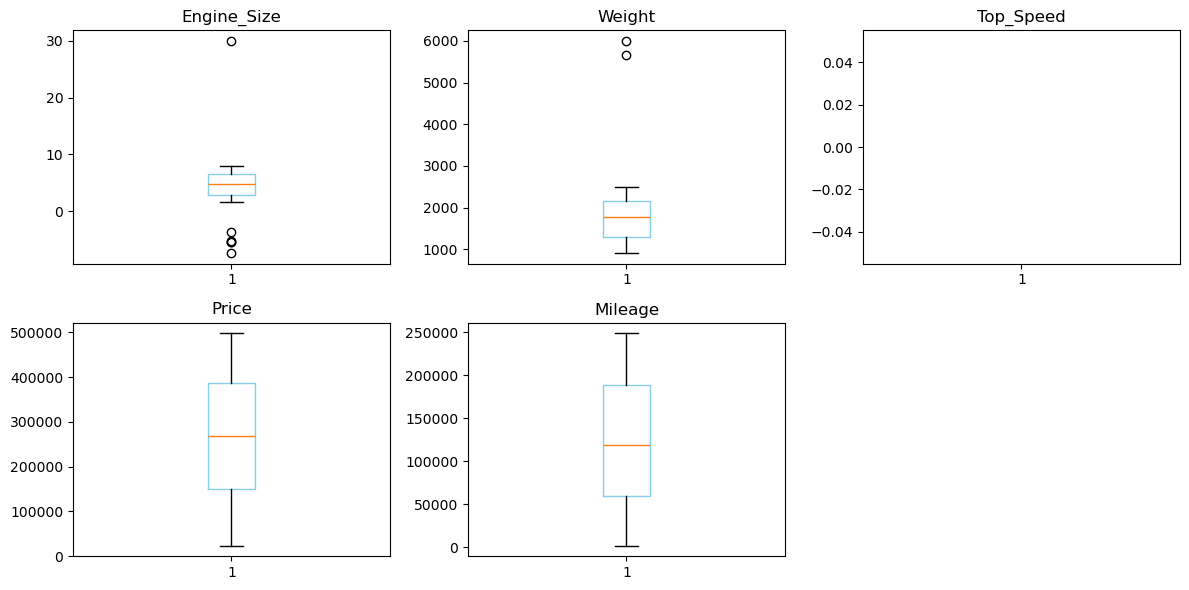

In [54]:
# Outlier detect by Boxplotting
cols = ['Engine_Size', 'Weight', 'Top_Speed', 'Price', 'Mileage']

plt.figure(figsize=(12, 6))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col], boxprops=dict(color='skyblue'))
    plt.title(col)

plt.tight_layout()
plt.show()


In [55]:
#  Outlier Treatment (Remove & Cap, Final Working)

num = df.select_dtypes(include='number')
Q1, Q3 = num.quantile(0.25), num.quantile(0.75)
IQR = Q3 - Q1

# Cap outliers (fix them inside df)
for c in num:
    low, high = Q1[c]-1.5*IQR[c], Q3[c]+1.5*IQR[c]
    df[c] = np.clip(df[c], low, high)

# Remove any extreme leftover rows (optional)
df = df[~((num < (Q1-1.5*IQR)) | (num > (Q3+1.5*IQR))).any(axis=1)]

print("Outliers treated successfully!")


Outliers treated successfully!


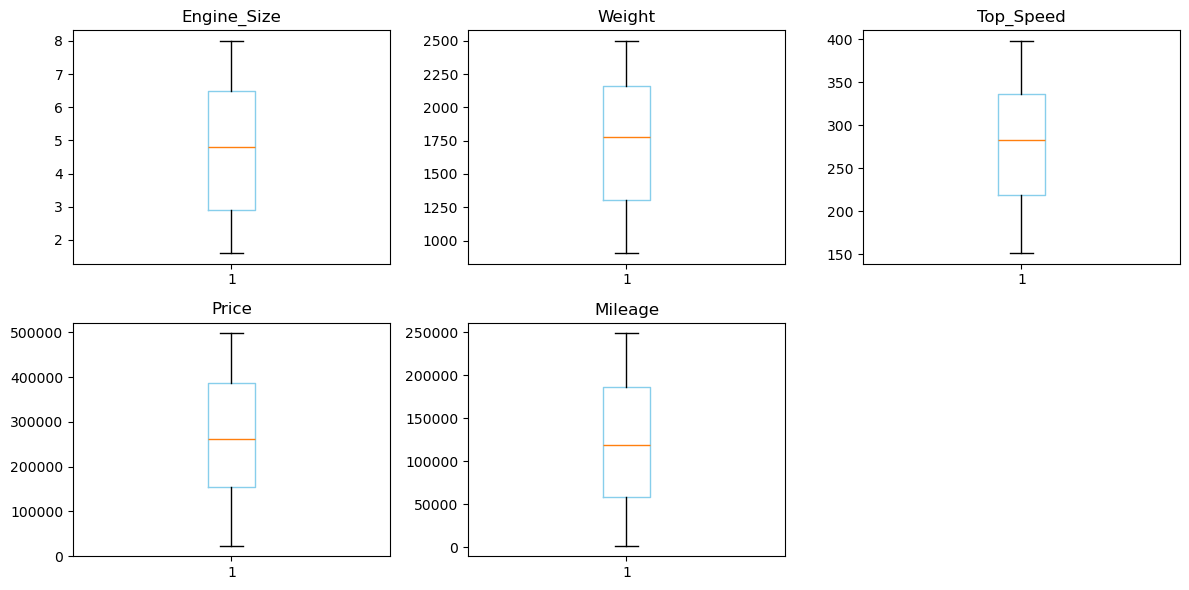

In [56]:
# Boxplot

cols = ['Engine_Size', 'Weight', 'Top_Speed', 'Price', 'Mileage']

plt.figure(figsize=(12, 6))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[col], boxprops=dict(color='skyblue'))
    plt.title(col)

plt.tight_layout()
plt.show()


# Data Visualization
### Univariate Analysis

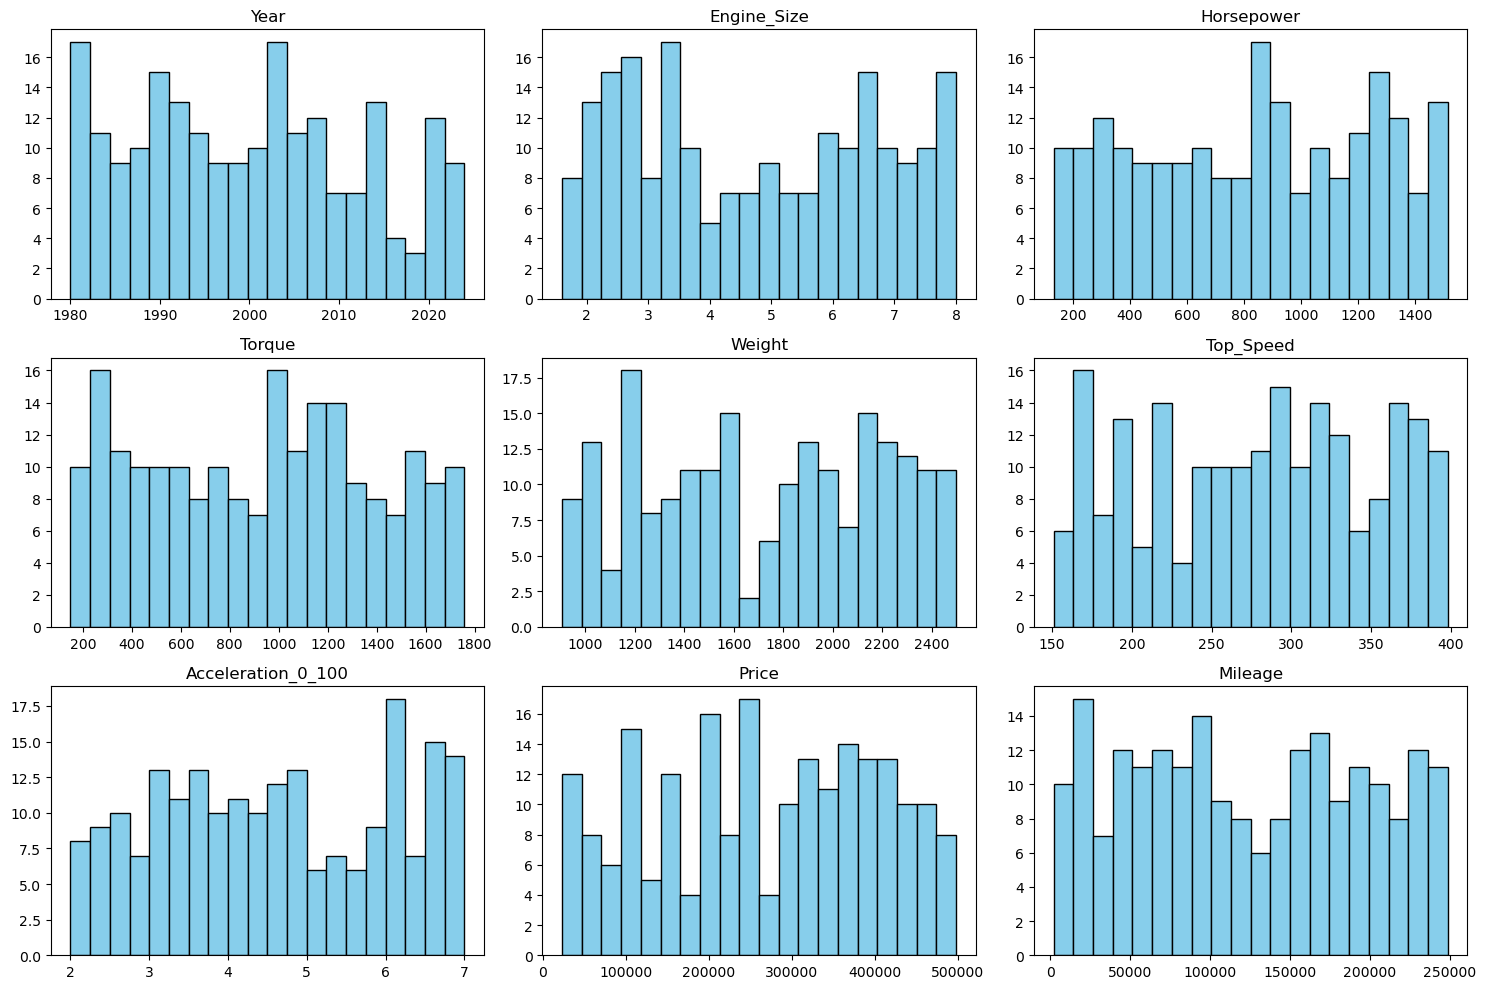

In [58]:
# Histogram

num_df = df.select_dtypes(include='number')

cols = 3
rows = math.ceil(len(num_df.columns) / cols)

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_df.columns, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)

plt.tight_layout()
plt.show()


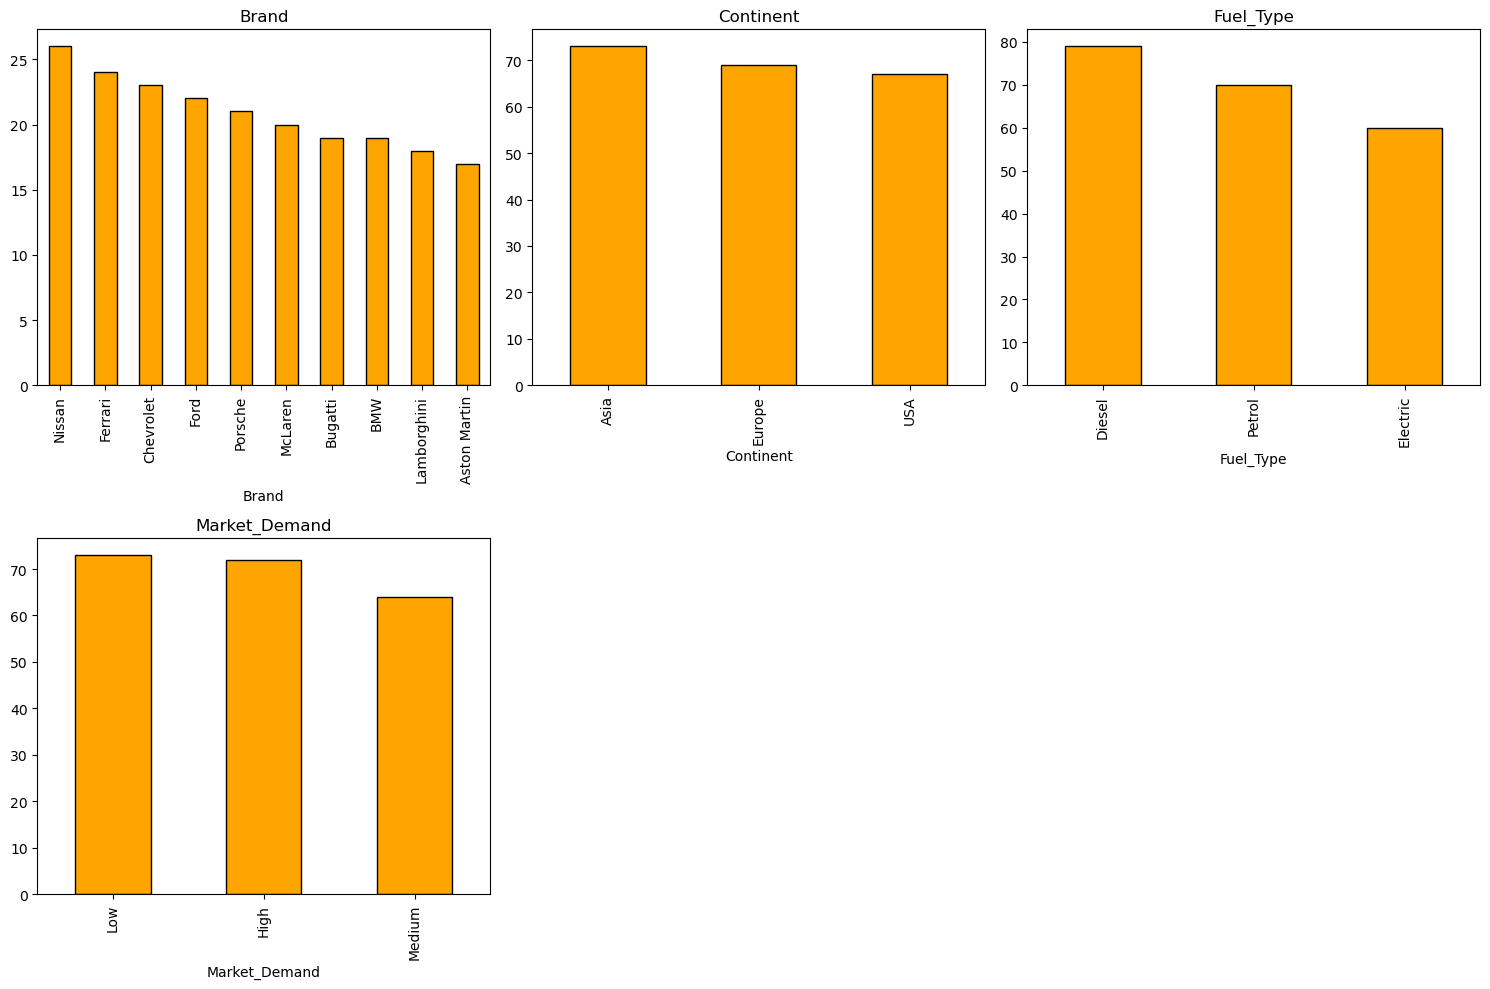

In [59]:
# Bar Chart(for categorical data)

cat_cols = df.select_dtypes(include='object').columns
rows = math.ceil(len(cat_cols) / 3)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, 3, i)
    df[col].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title(col)
plt.tight_layout()
plt.show()


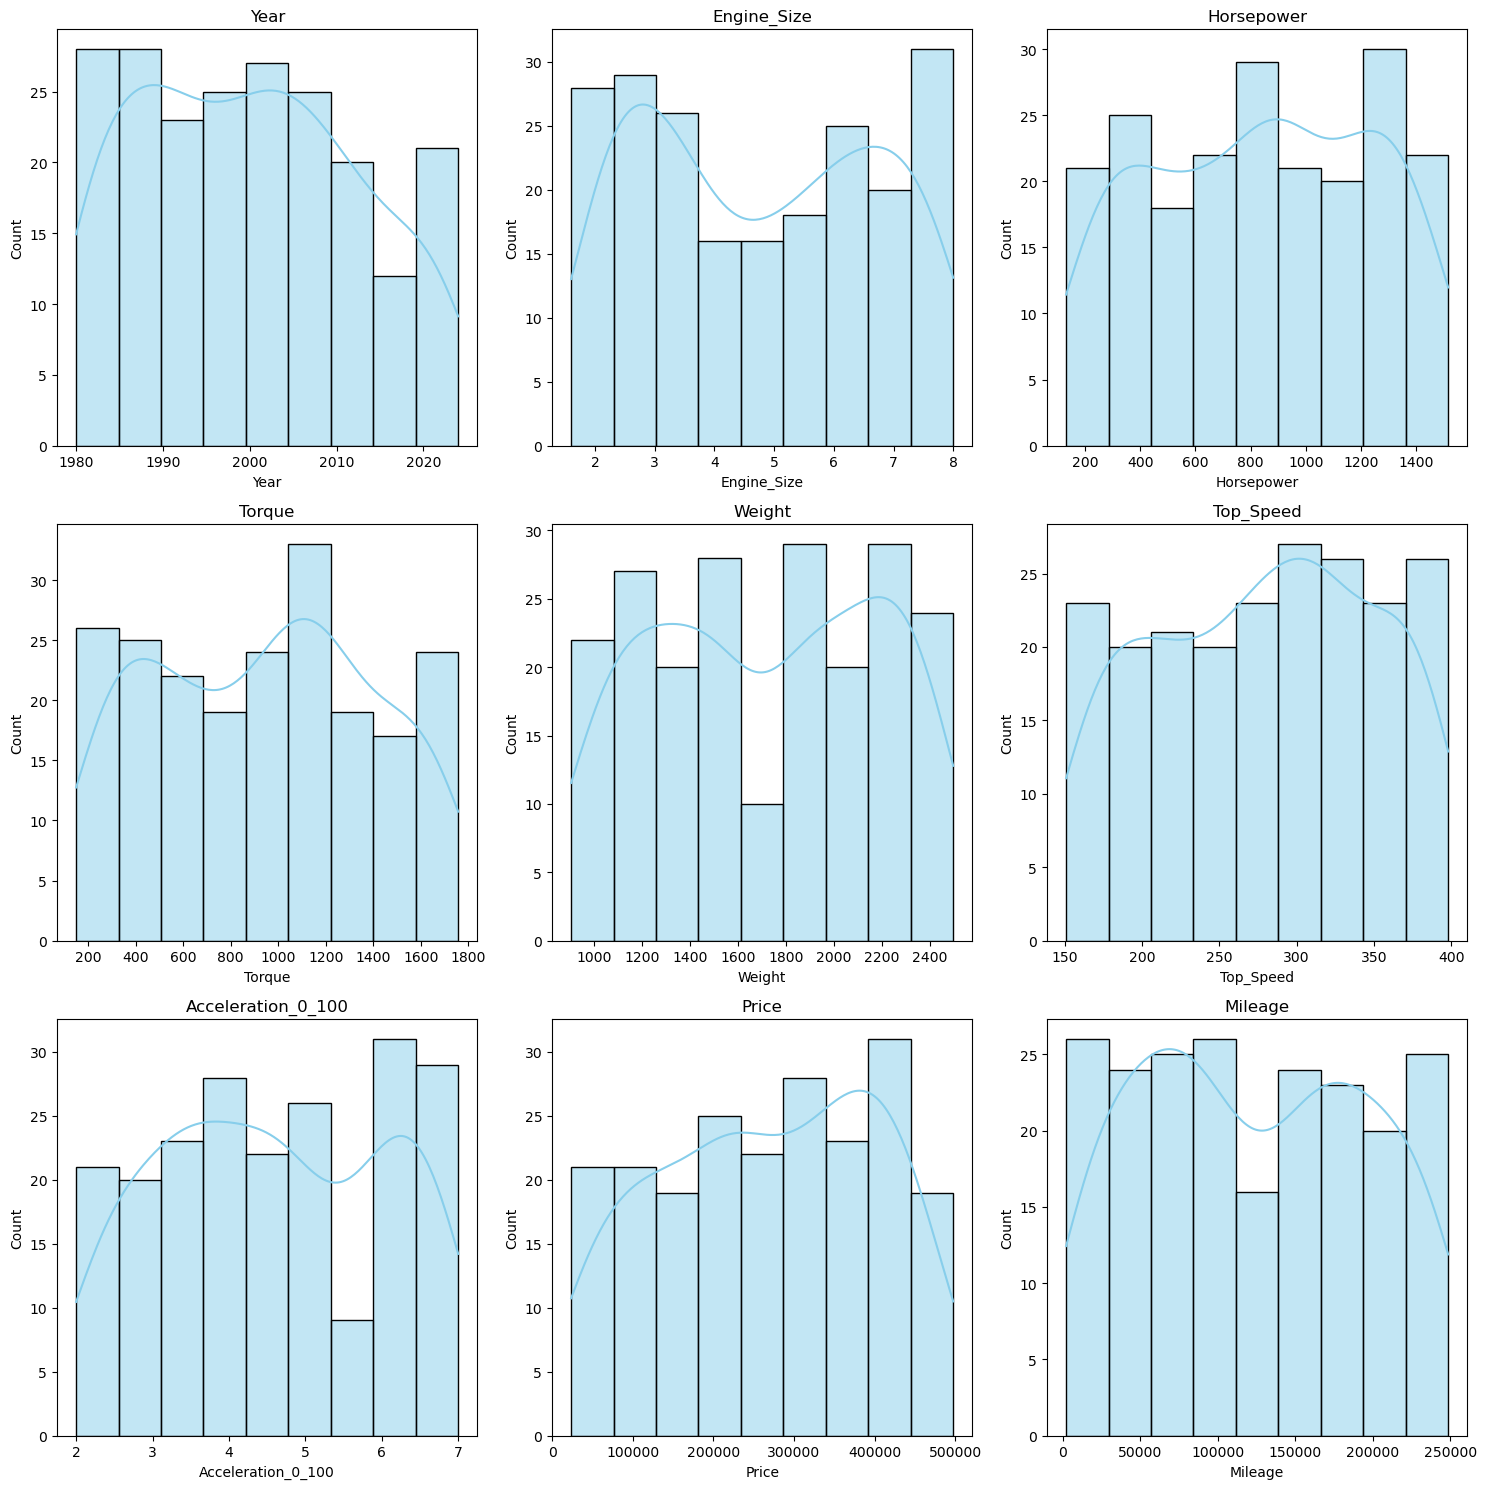

In [61]:
# Distribution plot (if using seaborn)

num_cols = df.select_dtypes(include='number').columns
rows = math.ceil(len(num_cols) / 3)

plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[c plot (if using seaborn)ol], kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


###  Bivariate Analysis

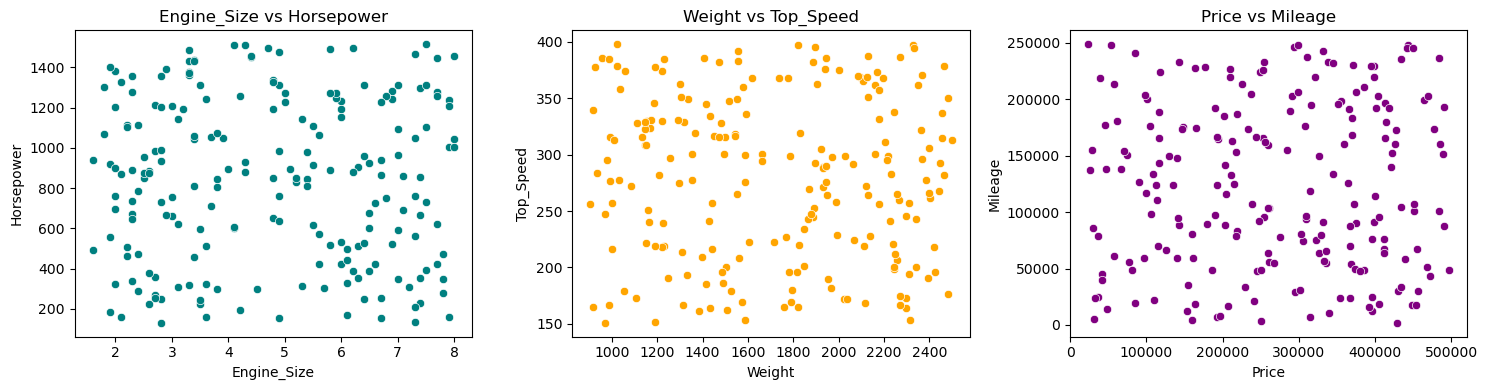

In [63]:
# Scatter plot

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Engine_Size', y='Horsepower', data=df, color='teal')
plt.title('Engine_Size vs Horsepower')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Weight', y='Top_Speed', data=df, color='orange')
plt.title('Weight vs Top_Speed')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Price', y='Mileage', data=df, color='purple')
plt.title('Price vs Mileage')

plt.tight_layout()
plt.show()


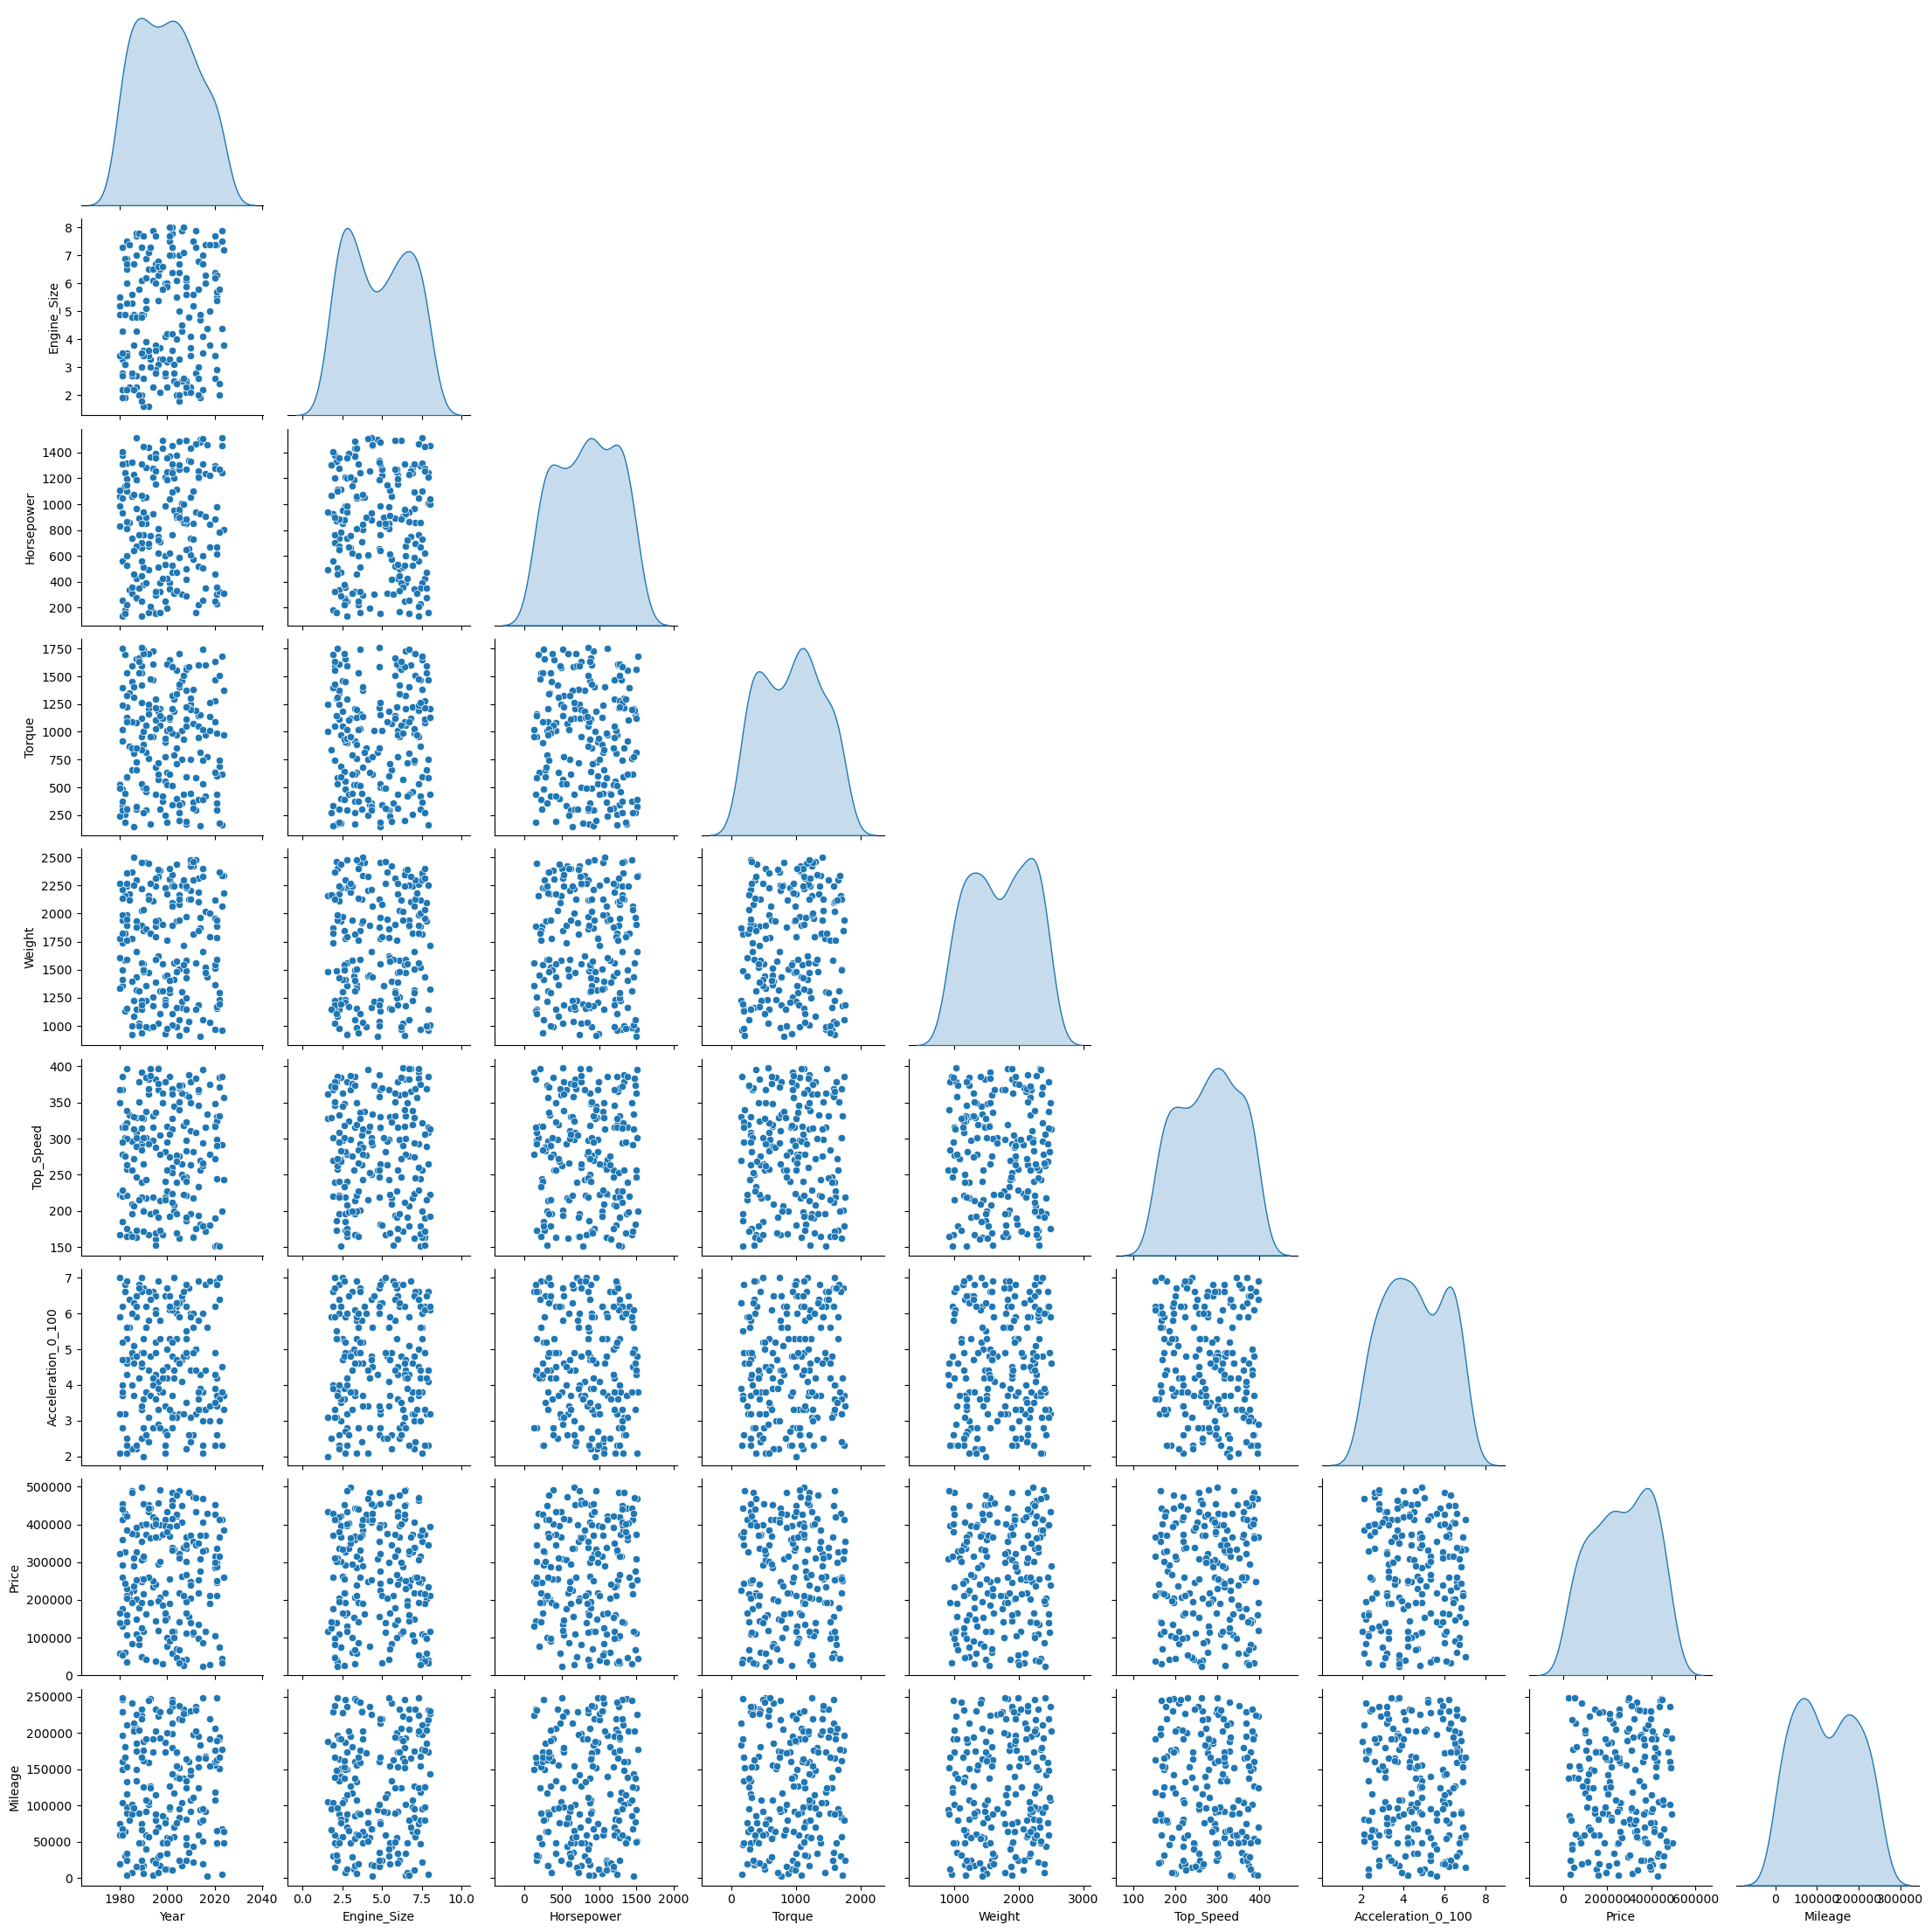

In [65]:
# Pair Plot

sns.pairplot(df.select_dtypes(include='number'), diag_kind='kde', corner=True)


                        Year  Engine_Size  Horsepower    Torque    Weight  \
Year                1.000000     0.090395    0.073066 -0.023188  0.025415   
Engine_Size         0.090395     1.000000   -0.019853  0.083475  0.046302   
Horsepower          0.073066    -0.019853    1.000000 -0.099216 -0.020703   
Torque             -0.023188     0.083475   -0.099216  1.000000  0.063749   
Weight              0.025415     0.046302   -0.020703  0.063749  1.000000   
Top_Speed           0.011360    -0.048034   -0.059083 -0.018336 -0.044618   
Acceleration_0_100 -0.040221    -0.004673   -0.095602  0.134773  0.034474   
Price               0.019250    -0.026874    0.009053  0.001937  0.067440   
Mileage             0.062424     0.102902    0.023011  0.026451  0.083483   

                    Top_Speed  Acceleration_0_100     Price   Mileage  
Year                 0.011360           -0.040221  0.019250  0.062424  
Engine_Size         -0.048034           -0.004673 -0.026874  0.102902  
Horsepower   

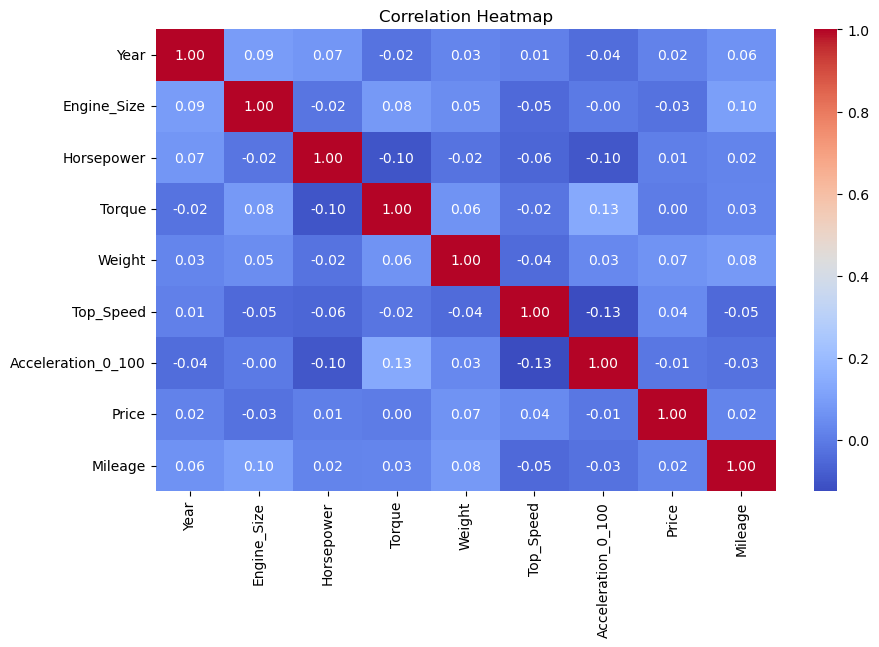

In [67]:
# Correlation Matrix + Heatmap

corr = df.select_dtypes(include='number').corr()
print(corr)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


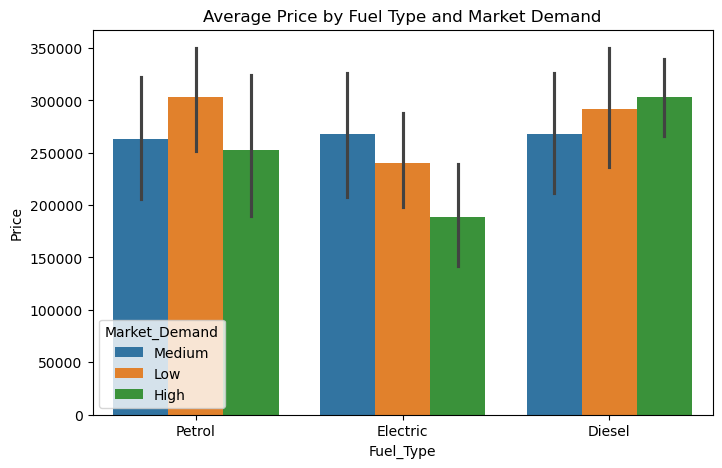

In [68]:
# Grouped Bar

plt.figure(figsize=(8,5))
sns.barplot(x='Fuel_Type', y='Price', hue='Market_Demand', data=df)
plt.title("Average Price by Fuel Type and Market Demand")
plt.show()


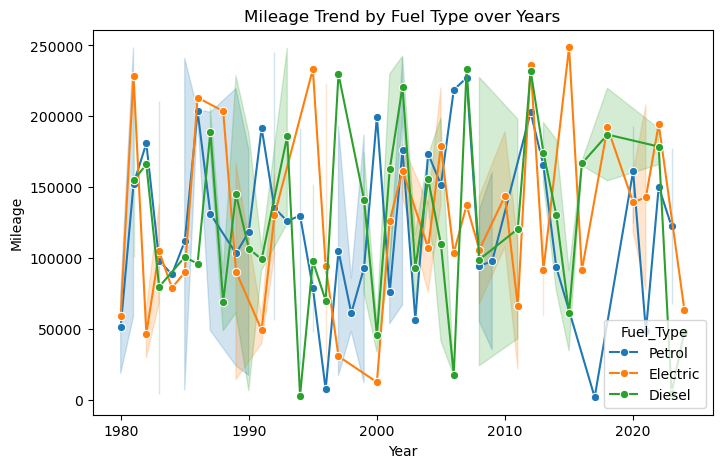

In [69]:
# Line Chart 

plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='Mileage', hue='Fuel_Type', data=df, marker='o')
plt.title("Mileage Trend by Fuel Type over Years")
plt.show()


# 8. Multivariate Analysis

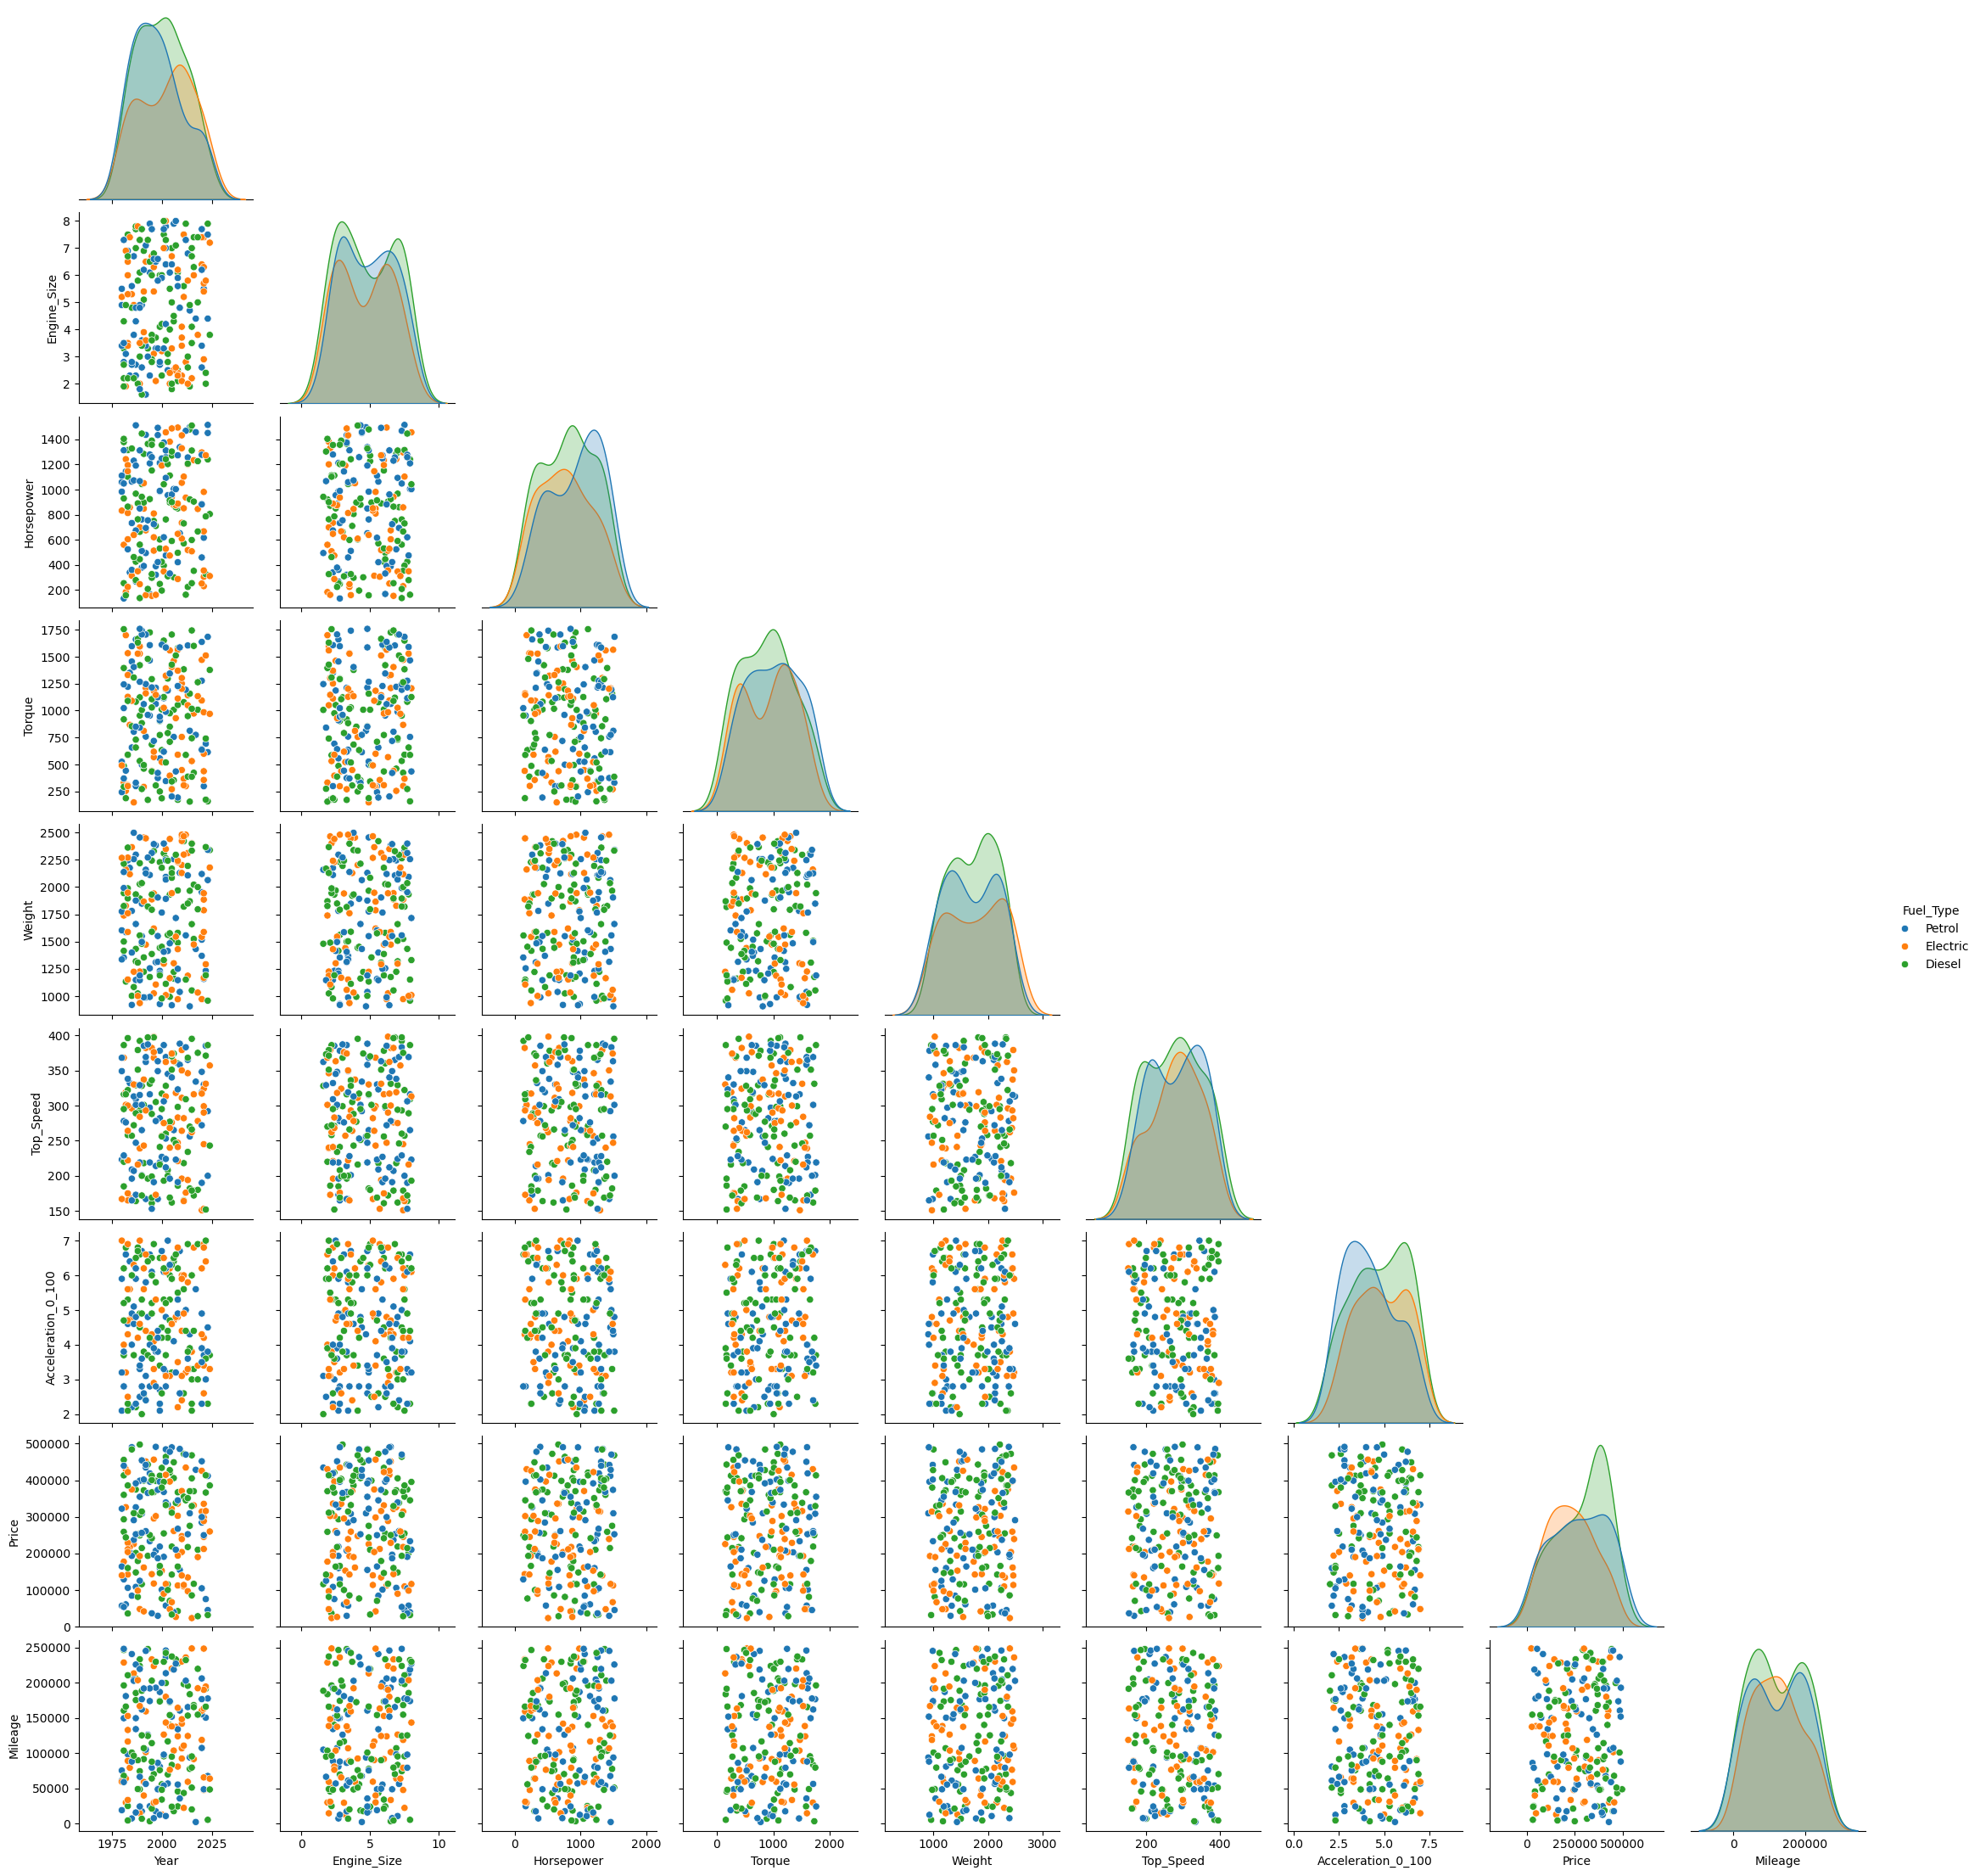

In [70]:
# Pairplot with hue

sns.pairplot(df, hue='Fuel_Type', diag_kind='kde', corner=True)


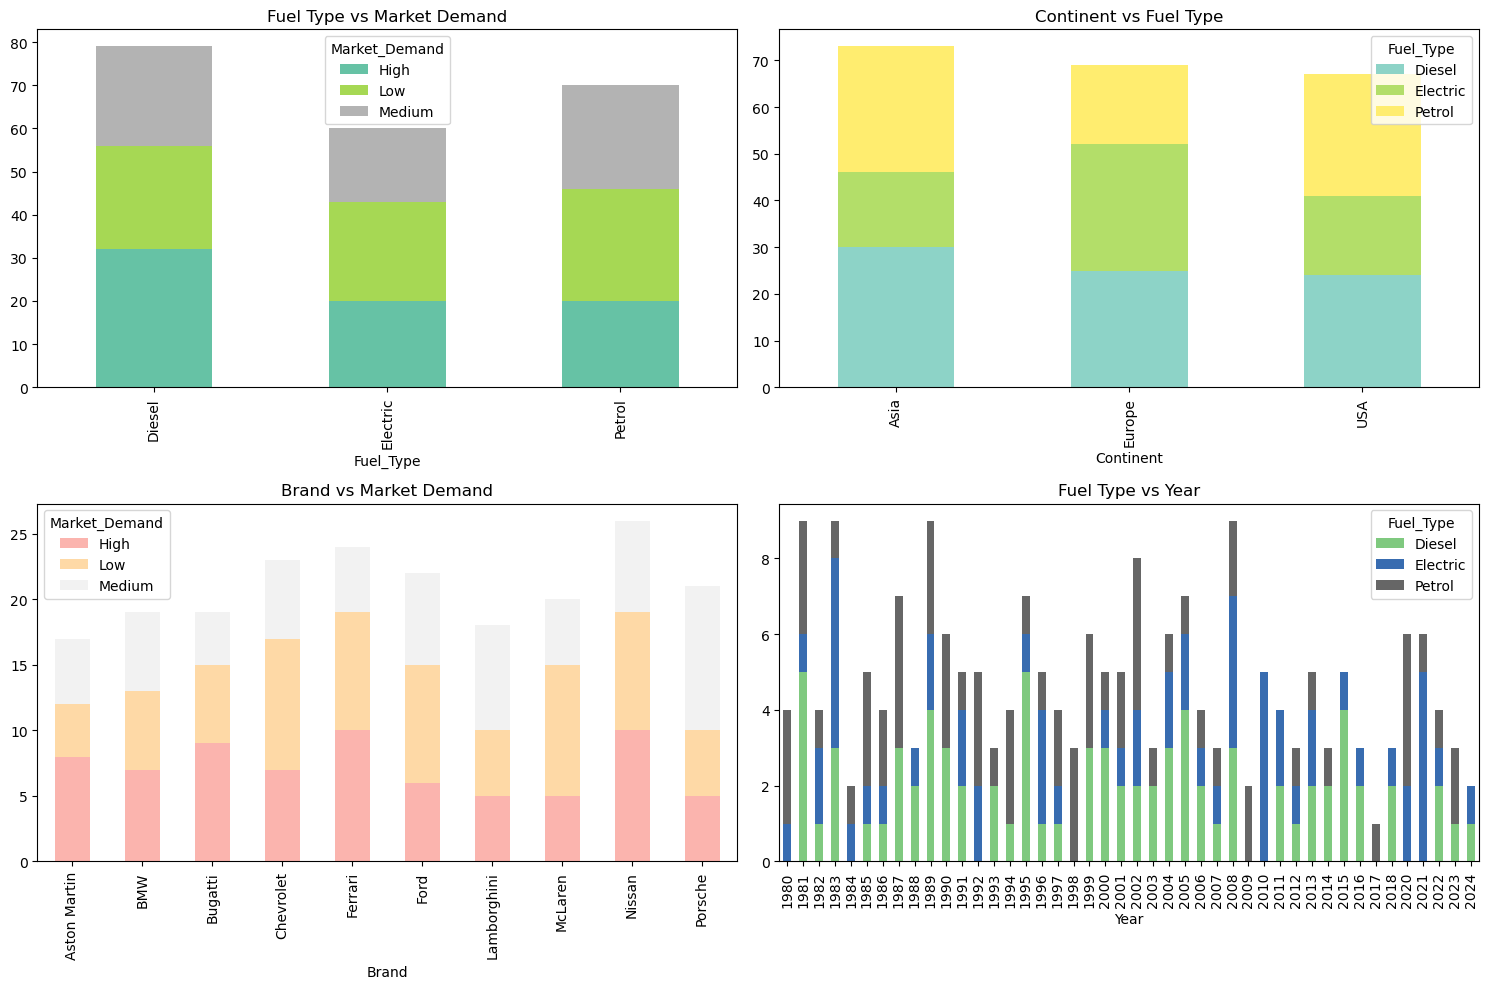

In [72]:
# Stacked bar charts

plt.figure(figsize=(15,10))

# 1️ Fuel Type vs Market Demand
plt.subplot(2,2,1)
df.groupby(['Fuel_Type','Market_Demand']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set2')
plt.title("Fuel Type vs Market Demand")

# 2️ Continent vs Fuel Type
plt.subplot(2,2,2)
df.groupby(['Continent','Fuel_Type']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Set3')
plt.title("Continent vs Fuel Type")

# 3️ Brand vs Market Demand
plt.subplot(2,2,3)
df.groupby(['Brand','Market_Demand']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Pastel1')
plt.title("Brand vs Market Demand")

# 4️ Fuel Type vs Year
plt.subplot(2,2,4)
df.groupby(['Year','Fuel_Type']).size().unstack().plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Accent')
plt.title("Fuel Type vs Year")

plt.tight_layout()
plt.show()


# 9. Insights & Interpretation


### Key Findings & Insights

### Trends and anomalies

### Relationships between features

### Implications for modeling